# Workbook #3
This workbook goes over examining two and more variables at a time.

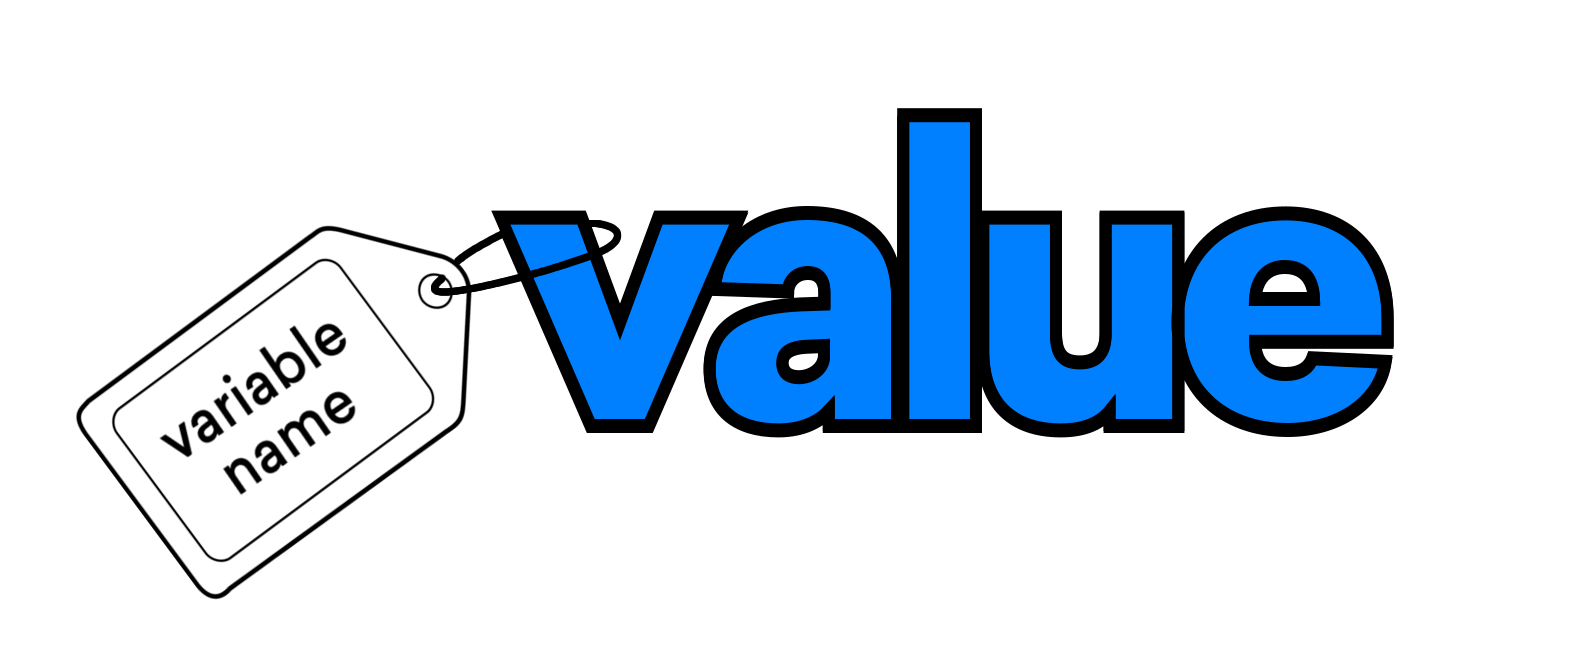

Last week, we talked about variables. There are categorical and numeric variables. When we modeling relationships, it has to be between at least two different variables.
* Relationship between two categorical variables
* Relationship between two numeric variables
* Relationship between one categorical and one numeric variable.

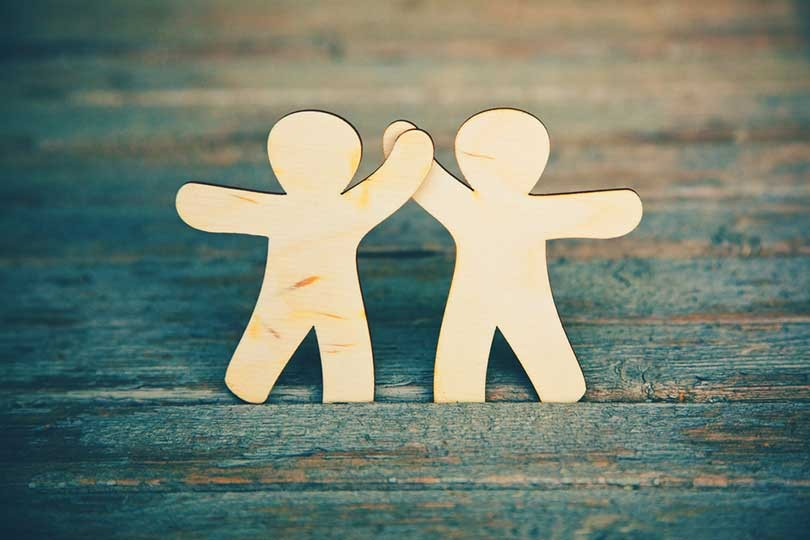

### Relationship between two categorical variables
When establishing an association/relationship between two categorical variables, you look for the following:
* If one variable changes, then the other variable changes.
* If one variable DOES NOT change, then the other variable DOES NOT change.

<b>Table 3.1a: Hypothetical strong association

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 300 | 1000 | 1300 |
|  | 23% | 77% |  |
| Republication | 700 | 200 | 900 |
|  | 78% | 22% | |

<b>Table 3.1b: Hypothetical no association

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 500 | 500 | 1000 |
|  | 50% | 50% |  |
| Republication | 500 | 500 | 1000 |
|  | 50% | 50% | |

<b>Table 1c:  (ACTUAL) Gender and Party Affiliation in 2016

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 550 | 814 | 1364 |
|  | 40% | 60% |  |
| Republication | 457 | 469 | 926 |
|  | 49% | 51% | |

Note: data from General Social Survey 2016

*You can use chi-2 test in Stata to find out if there is a statistically significant relationship between the two vairables. 

In [1]:
*Make a week 3 folder in your SOC 211 folder
*Set-up working directory to your week 3 folder
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3


In [3]:
sysuse auto
desc


(1978 automobile data)


Contains data from C:\Program Files\Stata17\ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2020 17:45
                                              (_dta has notes)
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %

In [4]:
tab rep78 foreign, chi2


    Repair |
    record |      Car origin
      1978 |  Domestic    Foreign |     Total
-----------+----------------------+----------
         1 |         2          0 |         2 
         2 |         8          0 |         8 
         3 |        27          3 |        30 
         4 |         9          9 |        18 
         5 |         2          9 |        11 
-----------+----------------------+----------
     Total |        48         21 |        69 

          Pearson chi2(4) =  27.2640   Pr = 0.000


Here the null hypthesis is variables rep78 and foreign are independent of each other. Since our chi-2 square value is very high (~27) and the p-value is less than .05, there is a statistically significant relationship between the two variables.

### Relationship between two numeric variables
When examining relationships between two numerical variables, we are able to do more "traditional" statistics with them. 
* A relationship between numerical variables exists if we are able to say whether a change in a variable represents an increase or a decrease in value of another variable.

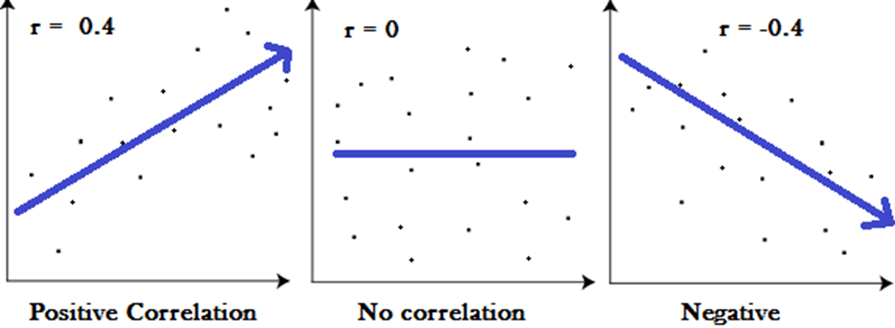

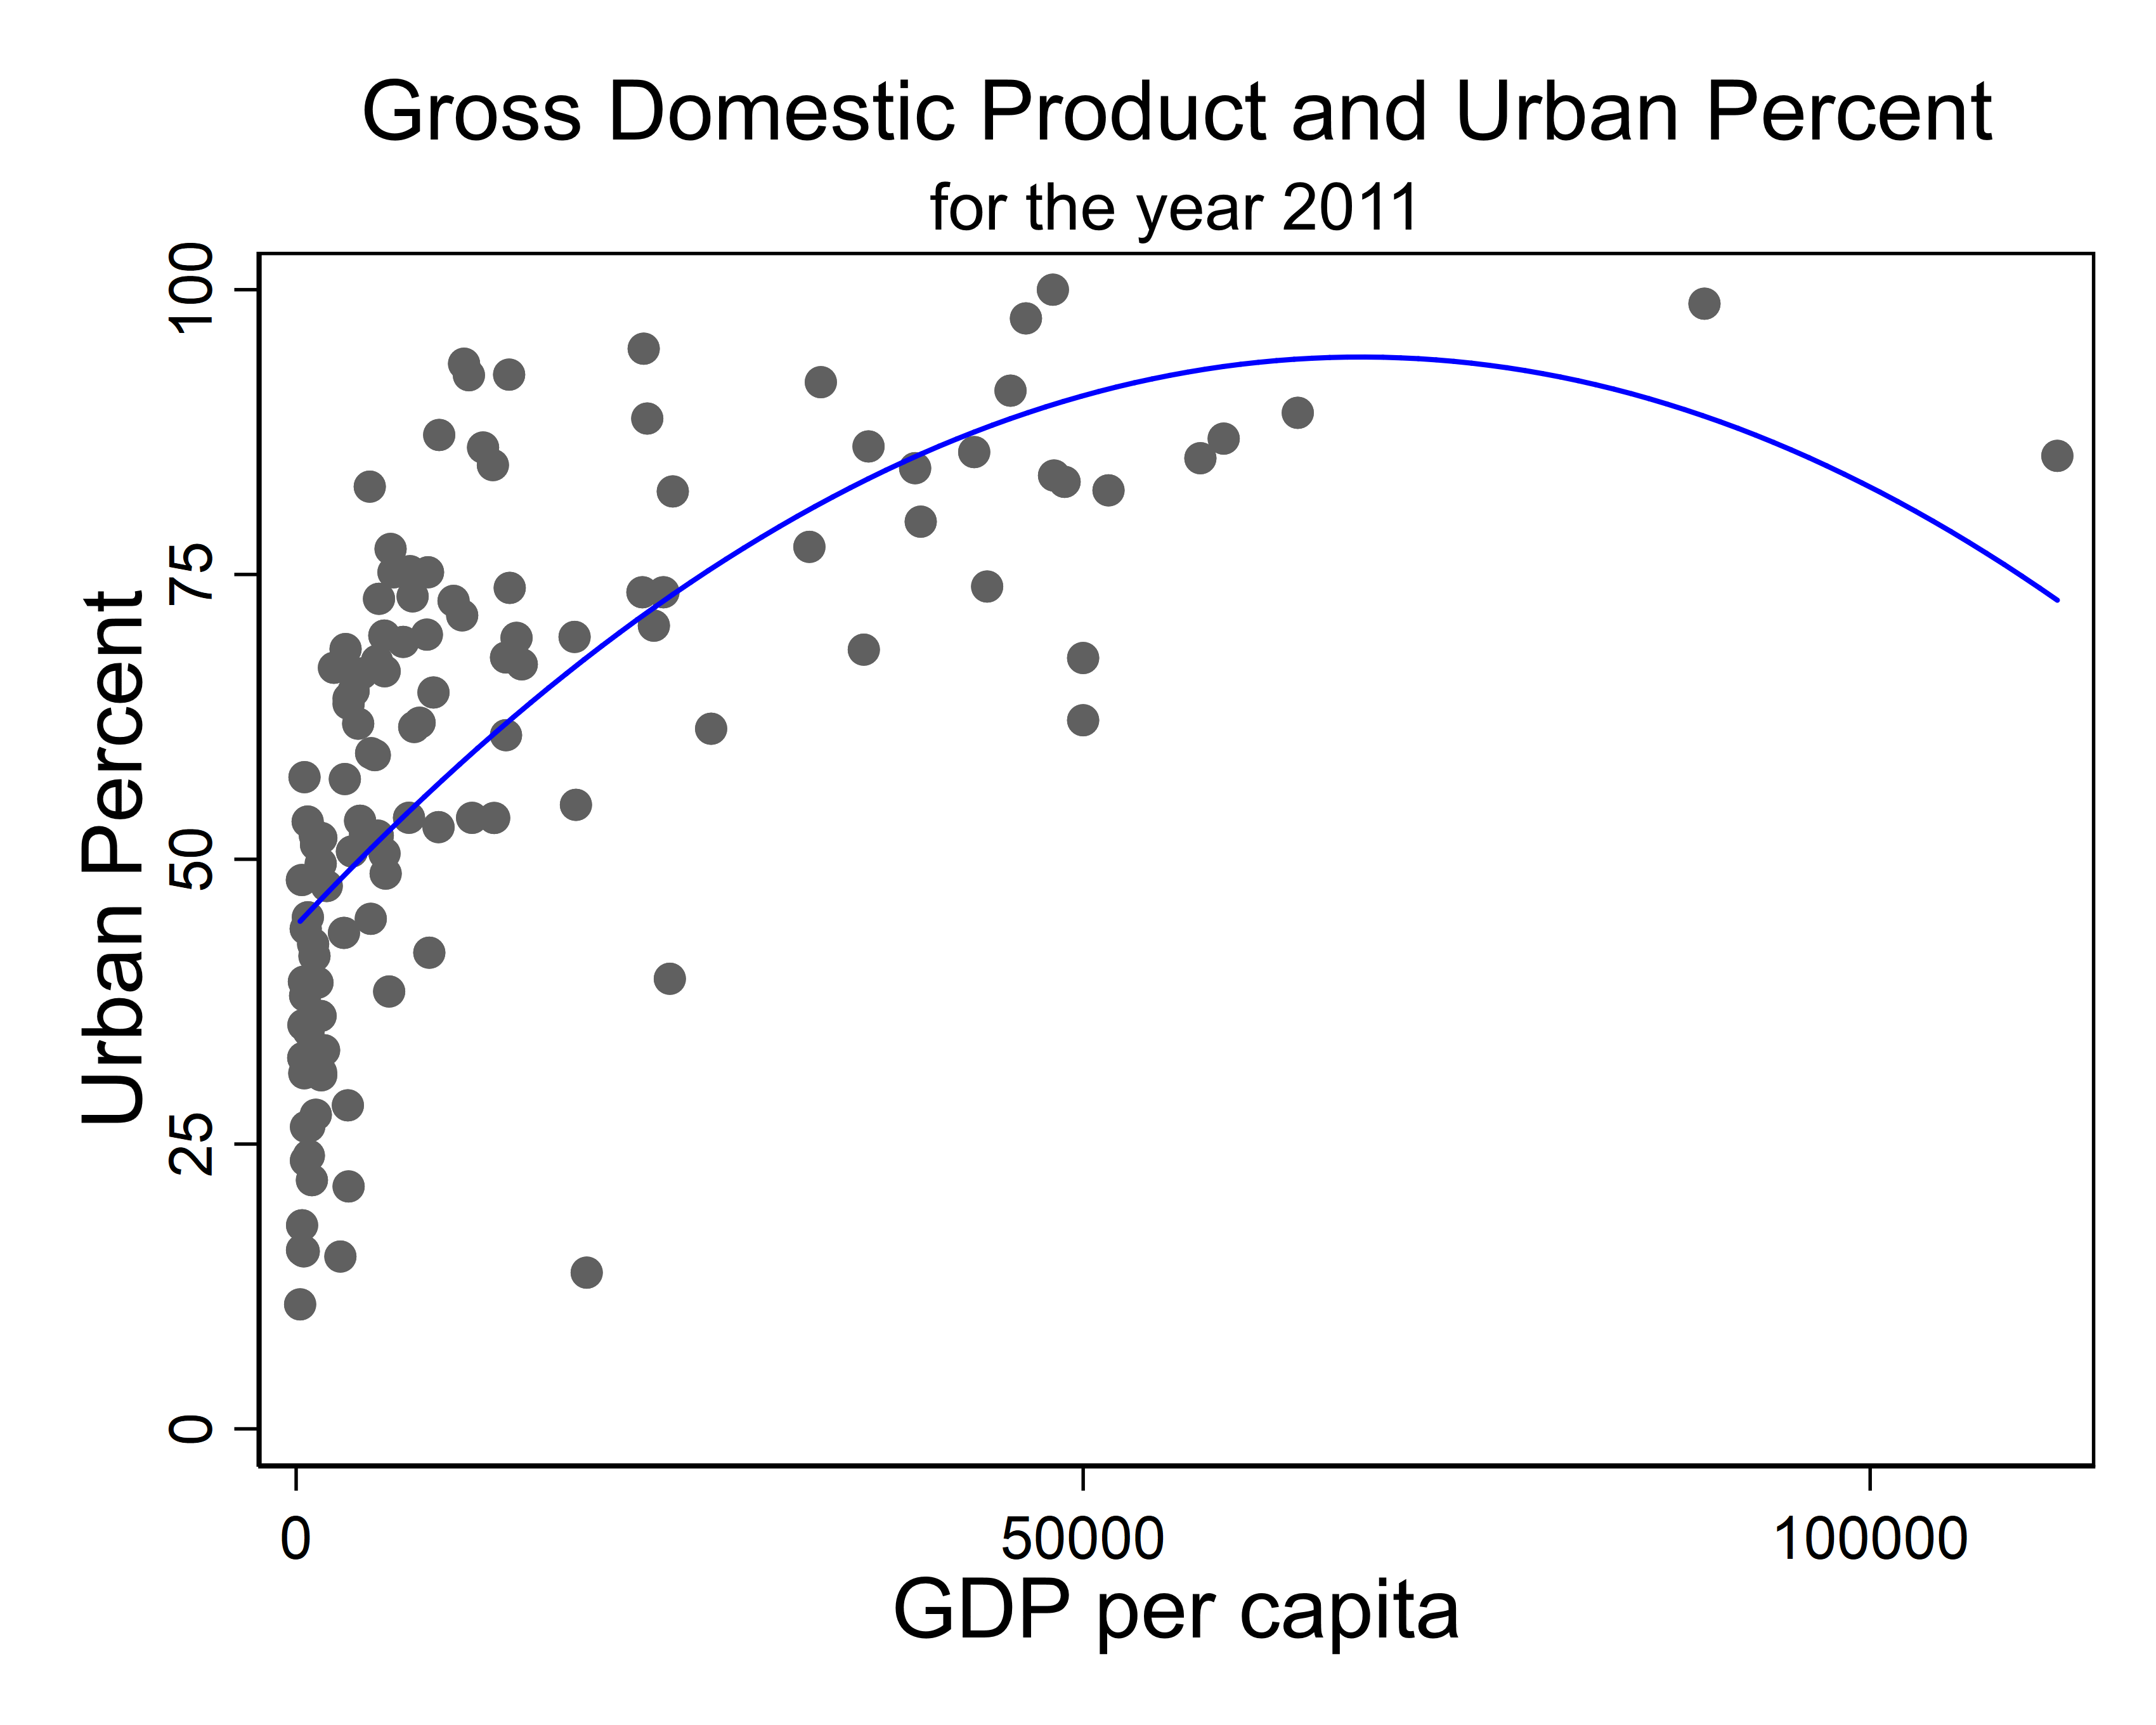

*In Stata, you can run a correlation matrix and you can run a test to see if the relationship is statistically significant.

In [12]:
use "http://www.stata-press.com/data/r13/auto1", clear
desc


(Automobile Models)


Contains data from http://www.stata-press.com/data/r13/auto1.dta
 Observations:            74                  Automobile Models
    Variables:            18                  3 Mar 2013 19:57
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
make            int     %8.0g      make       Make
model           int     %8.0g      model      Model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g      repair     Repair Record 1978
rep77           int     %8.0g      repair     Repair Record 1977
headroom        float   %6.1f                 Headroom (in.)
rear_seat       float   %6.1f                 Rear Seat (in.)
trunk           int     %8.0g                 Trunk s

In [13]:
correlate mpg price

(obs=74)

             |      mpg    price
-------------+------------------
         mpg |   1.0000
       price |  -0.4594   1.0000



In [14]:
pwcorr mpg price, obs sig


             |      mpg    price
-------------+------------------
         mpg |   1.0000 
             |
             |       74
             |
       price |  -0.4594   1.0000 
             |   0.0000
             |       74       74
             |


Here, we see a statistically significant relationship between mpg and price.

### Relationship between one categorical and one numeric variable
When examining relationships between categorical and numerical variables, we look for differences across the categories.
* Sometimes it helps to compare averages.

|  | white | Black | Asian | Latinx |
| --- | --- | --- | --- | --- |
| Median household income | 60,869 | 37,364 | 78,141 | 45,719 |

Note: Data from U.S. Census 2016

In Stata, to examine numeric statistics across a categorical variable, you can use the tabstat command.

In [25]:
use "https://www.stata-press.com/data/r17/lbw.dta", clear
desc


(Hosmer & Lemeshow data)


Contains data from https://www.stata-press.com/data/r17/lbw.dta
 Observations:           189                  Hosmer & Lemeshow data
    Variables:            11                  15 Jan 2020 05:01
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
id              int     %8.0g                 Identification code
low             byte    %8.0g                 Birthweight<2500g
age             byte    %8.0g                 Age of mother
lwt             int     %8.0g                 Weight at last menstrual period
race            byte    %8.0g      race       Race
smoke           byte    %9.0g      smoke      Smoked during pregnancy
ptl             byte    %8.0g                 Premature labor history (count)
ht              byte    %8.0g               

In [26]:
tabstat age, by(smoke) stat(n mean sd min median max)



Summary for variables: age
Group variable: smoke (Smoked during pregnancy)

    smoke |         N      Mean        SD       Min       p50       Max
----------+------------------------------------------------------------
Nonsmoker |       115  23.42609  5.467706        14        23        45
   Smoker |        74  22.94595  5.047424        14        22        35
----------+------------------------------------------------------------
    Total |       189   23.2381  5.298678        14        23        45
-----------------------------------------------------------------------


<b> In Stata, you can do a difference of mean test between a categorical variable with TWO categories. </b>

In [27]:
ttest age, by(smoke)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+--------------------------------------------------------------------
Nonsmoke |     115    23.42609    .5098662    5.467706    22.41605    24.43613
  Smoker |      74    22.94595    .5867511    5.047424    21.77655    24.11534
---------+--------------------------------------------------------------------
Combined |     189     23.2381    .3854221    5.298678    22.47779     23.9984
---------+--------------------------------------------------------------------
    diff |             .480141    .7909778               -1.080245    2.040528
------------------------------------------------------------------------------
    diff = mean(Nonsmoke) - mean(Smoker)                          t =   0.6070
H0: diff = 0                                     Degrees of freedom =      187

    Ha: dif

To do difference of mean across multiple categgories, you need to do ANOVA. That is more advanced stuff we will do later.

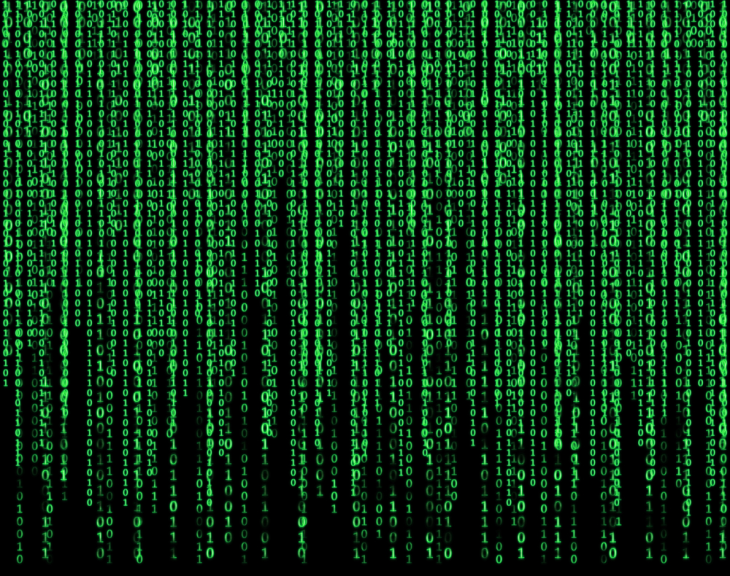

### The Third, Fourth, Fifth, ... variables
(This discussion is adapted from Treiman 2009 book: Quantitative Data Analysis)

Society is complicated, and usually we have more than two variables. Most quantitative analyses encompass many variables. We sometimes refer to this variables as control variables. Control variables are extraneous variables that are controlled in studies in order to reduce their influnece. With the third variable, we need to consider the following:
* When does the third variable intervene and think about time and casual order.

* Weak association -- when a third variable happens before the independent and dependent variables.
* Spurious association and intervening variables -- when a third variable happens between the independent and dependent variable.

#### Spurious association
* Entirely spurious happens when the third variable (Z) COMPLETELY explains the relationship between x -> y. In other words, there is no relationship between x -> y.

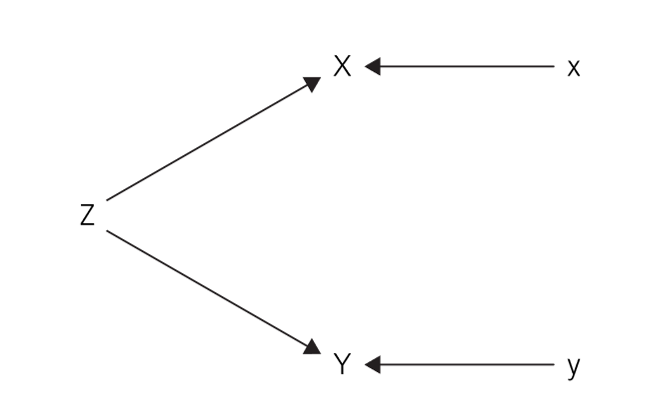


* Partly spurious is USUALLY what happens, because society is complicated. Z influences X and Y. X influences Y.

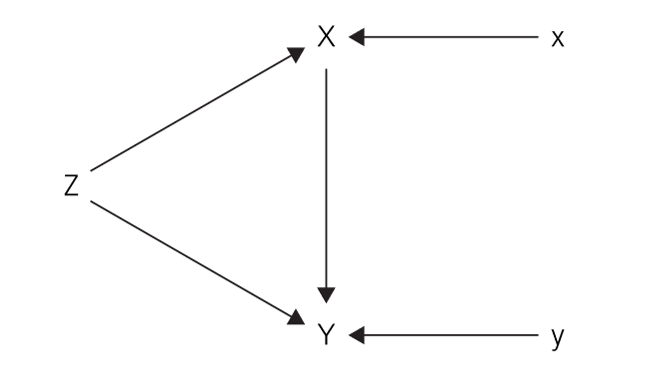

#### Intervening variable
* Entirely intervening variable -- when the relationship between X -> Y is ENTIRELY explained by intervening variable Z. 
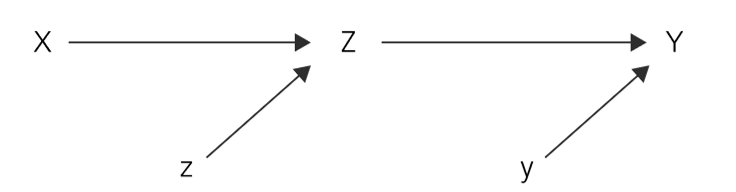

* Partly intervening variable -- when the relationship between X -> Y is PARTLY explained by Z. However, there is some influence of X -> Y. (This happens more because society is complicated.)
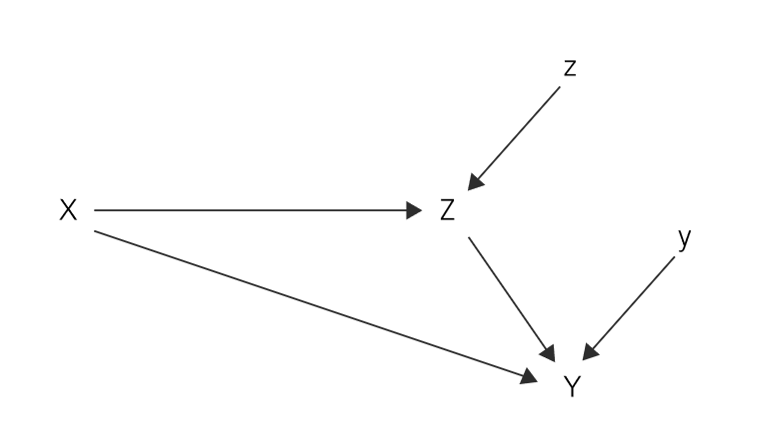

* Partly intervening variable part 2 -- when the relationship between X -> Y is PARTLY explained by Z. However, there is some influence of X -> Y. AND Z -> X (This happens more because society is complicated.)

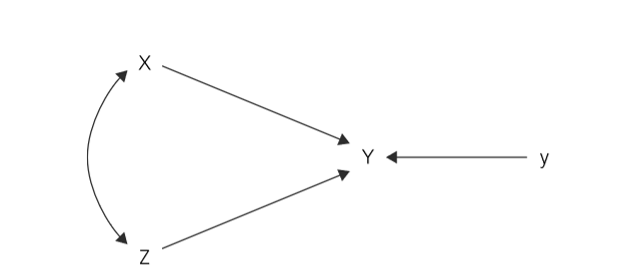

One way to examine spurious and intervening variables when using tables like we did above, is by using direct standardized rates of the data.

#### Direct standardization (Covariate adjustment)
This is a way to calculate the effect X -> Y WHILE controlling for variable Z. The way you do this is by adjusting the percentage based on the weights of the third variable.

Treiman uses the following example in their textbook. Treiman uses data from an ASR article published in the 1967 examining what affects a Black person's militancy beliefs for civil rights. The main predictor is religious background and the main control variable is educational attainment.

Let's say we wanted to see the breakdown of militancy across religious belief ADJUSTED for educational attainment.

* y: militant/nonmilitant (dictochous and dummy variable)
* x: religious belief -- "very religious", "somewhat religious", and "not very and not at all religious" (categorical and ordinal variable)
* z: educational attainment --- "grammar school", "high school", and "college" (categorical and ordinal variable)

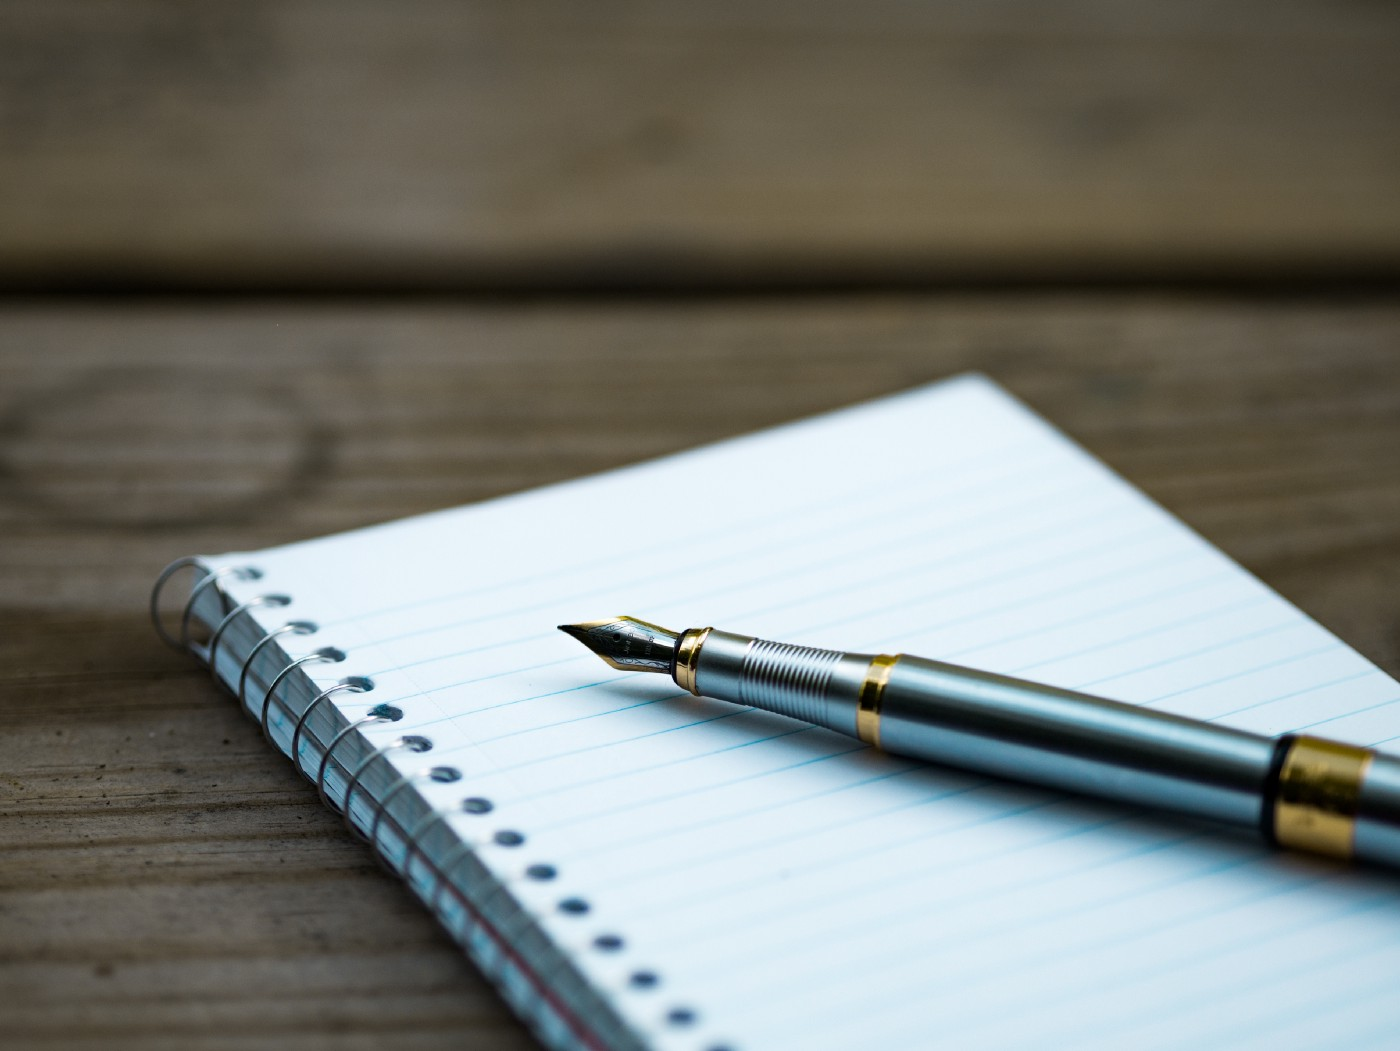

The following steps are needed to manually calculate the effect of religious belief on militancy ADJUSTED for educational attainment. We can do this by doing direct standardization.

* First, you need the frequency breakdown table of x -> y. This gives us the effect of x on y without any adjustments.

| Militancy | very religious | somewhat religious | not very and not all religious | total | 
| --- | --- | --- | --- | --- |
| militant | 61 (27%) | 160 (30%) | 112 (48%) | 333 |
| nonmilitant | 169 (73%) | 372 (70%) | 119 (52%) | 660 |
| Total | 230 (100%) | 532 (100%) | 231 (100%) | 993 (100%) |

* Second, we need to frequncy breakdown table of z. This gives us the adjustment-rate for the specific variables. Sometimes this can be referred to as variable weights.

| Educational attainment | frequency | % |
| --- | --- | --- |
| grammar school | 353 | 35.3%
| high school | 504 | 50.8% |
| college | 136 | 13.7% |
| Total | 993 | 100% |

* Third, we need to frequncy breakdown table of (x by z) AND (x by z) -> y. All combination categories of the main predictor and the third variable.

| freq by religion and educational attainment | grammar school | high school | college |
| --- | --- | --- | --- |
| very religious | 108 | 96 | 26 |
| somewhat religious | 201 | 270 | 61 |
| not very and not at all religious | 44 | 138 | 49 |

| percent militant by religion and educational attainment | grammar school | high school | college |
| --- | --- | --- | --- |
| very religious | 17% | 34% | 38% |
| somewhat religious | 22% | 32% | 48% |
| not very and not at all religious | 32% | 47% | 68% |

* Fourth, to calculate the adjusted rate of y for each category of variable x. Go one category at a time for variable x. For each category in variable x, multiply the adjustment-rate for each category in variable z with it's correponding rate for each category in variable x.

<b>% VERY RELIGIOUS ADJUSTED FOR EDUCATIONAL ATTAINMENT</b>

(% grammar school)x(% militancy for grammar school & very religious) + (% high school)x(% militancy for high school & very religious) + (% college)x(% militancy for college & very religious)  

$(.353)x(.17)+(.508)x(.34)+(.137)x(.38)$

29% (remember to convert the proportion to a percent)

<b>% SOMEWHAT RELIGIOUS ADJUSTED FOR EDUCATIONAL ATTAINMENT</b>

(% grammar school)x(% militancy for grammar school & somewhat religious) + (% high school)x(% militancy for high school & somewhat religious) + (% college)x(% militancy college & somewhat religious)  

$(.353)x(.22)+(.508)x(.32)+(.137)x(.48)$

31% (remember to convert the proportion to a percent)

<b>% NOT VERY AND NOT AT ALL RELIGIOUS ADJUSTED FOR EDUCATIONAL ATTAINMENT</b>

(% grammar school)x(% militancy for grammar school & not very and not all all religious) + (% high school)x(% militancy for high school & not very and not all all religious) + (% college)x(% militancy for college & not very and not all all religious)  

$(.353)x(.32)+(.508)x(.47)+(.137)x(.68)$

45% (remember to convert the proportion to a percent)

|  | percent militant | percent militant adjusted for education | N |
| --- | --- | --- | --- |
| very religious | 27% | 29% | 230 |
| somewhat religious | 30% | 31% | 532 |
| not very and not at all religious | 48% | 45% | 231 |
| percentage spread | 21% | 16% |  |

Percent militant sightly changes when controlling for education. As Treiman notes, we could (1-16/21=24) and say when controlling for educational attainment, percent militant variance decreases by 24%.  

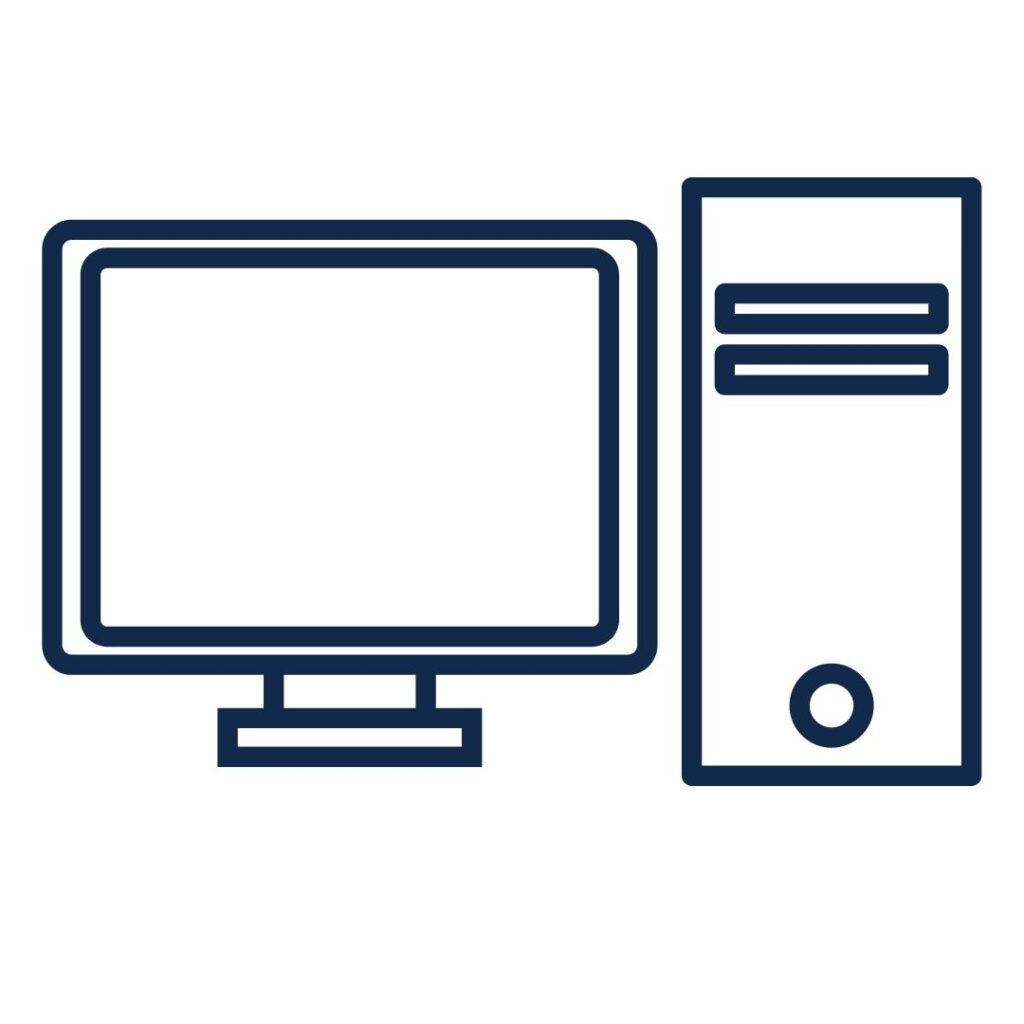

### Direct standardization in Stata
Stata can calculate direct standardization, but your data has to be in very specific way to work. Lets calculate the rates with just the information from the frequency tables above.

### Example 1: militancy

In [1]:
*Make a week 3 folder in your SOC 211 folder
*Set-up working directory to your week 3 folder
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3


In [2]:
*download "tab26_std.raw" from the catcourses
*move "tab26_std.raw" to your week 3 folder

In [5]:
infile mil total relig educ using tab26_std.raw , clear

(9 observations read)


In [6]:
*This data is basically frequency table from the third step above.
list


     +----------------------------+
     | mil   total   relig   educ |
     |----------------------------|
  1. |  17     108       1      1 |
  2. |  34      96       1      2 |
  3. |  38      26       1      3 |
  4. |  22     201       2      1 |
  5. |  32     270       2      2 |
     |----------------------------|
  6. |  48      61       2      3 |
  7. |  32      44       3      1 |
  8. |  47     138       3      2 |
  9. |  68      49       3      3 |
     +----------------------------+


| freq by religion and educational attainment | grammar school | high school | college |
| --- | --- | --- | --- |
| very religious | 108 | 96 | 26 |
| somewhat religious | 201 | 270 | 61 |
| not very and not at all religious | 44 | 138 | 49 |

| percent militant by religion and educational attainment | grammar school | high school | college |
| --- | --- | --- | --- |
| very religious | 17% | 34% | 38% |
| somewhat religious | 22% | 32% | 48% |
| not very and not at all religious | 32% | 47% | 68% |

In [12]:
/* mil is the percent of militant across relig and edu groups; 
total is the freq of across religion and edu
In order to do direct standardization in Stata, 
you need the freq of militant. 
So we are converting percent militant into a frequency*/

In [7]:
gen militant = round((mil/100)*total , 1)
list




     +---------------------------------------+
     | mil   total   relig   educ   militant |
     |---------------------------------------|
  1. |  17     108       1      1         18 |
  2. |  34      96       1      2         33 |
  3. |  38      26       1      3         10 |
  4. |  22     201       2      1         44 |
  5. |  32     270       2      2         86 |
     |---------------------------------------|
  6. |  48      61       2      3         29 |
  7. |  32      44       3      1         14 |
  8. |  47     138       3      2         65 |
  9. |  68      49       3      3         33 |
     +---------------------------------------+


In [13]:
*dstdize freq_of_outcome freq_by_both_variables third_variable, by(main_predictor)
dstdize militant total educ , by(relig)


Direct standardization

-------------------------------------------------------------
-> relig = 1 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
        1        108        18  0.470  0.1667   0.355  0.0592
        2         96        33  0.417  0.3438   0.508  0.1745
        3         26        10  0.113  0.3846   0.137  0.0527
-------------------------------------------------------------
Total:           230        61
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   65.9
                                          Crude rate = 0.2652
                                       Adjusted rate = 0.2864
                         95% conf. interval: [0.2263, 0.3464]

-------------------------------------------------------------
-> relig = 2 
    

### Example 2: low birthweight

Using manuel calculations and Stata to produce freq tables. Calculate the percent of low birthweight across race ADJUSTING for smoker. The answers are below, BUT TRY TO DO IT BY YOURSELF FIRST. Ask me questions!

In [37]:
*First, we need to import .dta file from the web
use "https://www.stata-press.com/data/r17/lbw.dta", clear
label define low 0 "non-low birthweight" 1 "low birthweight"
label values low low


(Hosmer & Lemeshow data)




Let's say we wanted to see the breakdown of low birthweight child across race ADJUSTED for smoking

y: low birthweight

x: race

z: third variable is smoker/non-smoker

* STEP 1: Make a freq table of x onto y

In [17]:
tab low race, col


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

                    |               Race
  Birthweight<2500g |     White      Black      Other |     Total
--------------------+---------------------------------+----------
non-low birthweight |        73         15         42 |       130 
                    |     76.04      57.69      62.69 |     68.78 
--------------------+---------------------------------+----------
    low birthweight |        23         11         25 |        59 
                    |     23.96      42.31      37.31 |     31.22 
--------------------+---------------------------------+----------
              Total |        96         26         67 |       189 
                    |    100.00     100.00     100.00 |    100.00 


| Birthweight < 2500g | white | Black | other | total | 
| --- | --- | --- | --- | --- |
| low birthweight | 23 (23.96%) | 11 (42.31%) | 25 (37.31%) | 59 (31.22%) |
| no low birthweight | 73 (76.04%) | 15 (57.69%) | 42 (62.69%) | 59 (68.78%) |
| Total | 96 (100%) | 26 (100%) | 68 (100%) | 189 (100%) |

* Second, we need to frequncy breakdown table of z->y. This gives us the adjustment-rate for the specific variables. Sometimes this can be referred to as variable weights.

In [18]:
tab smoke


     Smoked |
     during |
  pregnancy |      Freq.     Percent        Cum.
------------+-----------------------------------
  Nonsmoker |        115       60.85       60.85
     Smoker |         74       39.15      100.00
------------+-----------------------------------
      Total |        189      100.00


| Smoked during pregnancy | freq | % | 
| --- | --- | --- |
| Nonsmoker |  115 | 60.85 |
| Smoker | 74  | 39.15 |
| Total | 189 | 100.00 |

* Third, we need to frequncy breakdown table of (x by z) -> y. All combination categories of the main predictor and the third variable.

In [19]:
tab race smoke


           |     Smoked during
           |       pregnancy
      Race | Nonsmoker     Smoker |     Total
-----------+----------------------+----------
     White |        44         52 |        96 
     Black |        16         10 |        26 
     Other |        55         12 |        67 
-----------+----------------------+----------
     Total |       115         74 |       189 


| freq by race and smoke | nonsmoker | smoke | total |
| --- | --- | --- | --- |
| white | 44 | 52 | 96 |
| Black | 16 | 10 | 26 |
| other | 55 | 12 | 67 |
| total | 115 | 74 | 189 |

In [31]:
table low race smoke, stat(freq)


----------------------------------------------------
                      |    Smoked during pregnancy  
                      |   Nonsmoker   Smoker   Total
----------------------+-----------------------------
Birthweight<2500g     |                             
  non-low birthweight |                             
    Race              |                             
      White           |          40       33      73
      Black           |          11        4      15
      Other           |          35        7      42
      Total           |          86       44     130
  low birthweight     |                             
    Race              |                             
      White           |           4       19      23
      Black           |           5        6      11
      Other           |          20        5      25
      Total           |          29       30      59
  Total               |                             
    Race              |                      

| race | nonsmoker | smoker | total | 
| --- | --- | --- | --- |
| white | 4 | 19 | 23 |
| Black | 5 | 6 | 11 |
| other | 20 | 5 | 25 |
| Total | 29 | 30 | 59 |

* STEP 4, calculate.

<b>% WHITE ADJUSTED FOR SMOKER STATUS</b>

(% nonsmoker)x(% nonsmoker & white) + (% smoke)x(% smoke & white) 

$(.6085)*(4/44)+(.3915)*(19/44)$

$(.6085)*(.0909)+(.3915)*(.3654)$

19.84%

<b>% BLACK ADJUSTED FOR SMOKER STATUS</b>

(% nonsmoker)x(% nonsmoker & Black) + (% smoke)x(% smoke & Black)

$(.6085)*(5/16)+(.3915)*(6/10)$

$(.6085)*(.3125)+(.3915)*(.600)$

42.5%

<b>% OTHER ADJUSTED FOR SMOKER STATUS</b>

(% nonsmoker)x(% nonsmoker & other) + (% smoke)x(% smoke & other)

$(.6085)*(20/55)+(.3915)*(5/12)$
$(.6085)*(.3636)+(.3915)*(.4167)$

38.44%

In [28]:
*Stata can work as a calculator (see below)

In [12]:
di (115/189)*(4/44)+(74/189)*(19/44)
di (.6085)*(.0909)+(.3915)*(.3654)
di .0553+.1431


.22438672

.19836675

.1984


In [13]:
di (115/189)*(5/16)+(74/189)*(6/10)
di (.6085)*(.3125)+(.3915)*(.600)
di .1901+.2349


.42506614

.42505625

.425


In [14]:
di (115/189)*(20/55)+(74/189)*(5/12)
di (.6085)*(.3636)+(.3915)*(.4167)
di .2213+.1631


.38439955

.38438865

.3844


### Now, let's check our manuel calculations with stata. 
Now, we could do it two ways.

#### METHOD 1
We could collapse the data into freq and percent (like militant example)

In [50]:
*First, we need to import .dta file from the web
use "https://www.stata-press.com/data/r17/lbw.dta", clear


(Hosmer & Lemeshow data)




In [51]:
gen count=1
collapse (sum) count (mean) low, by(race smoke)

In [52]:
gen low_freq=(low)*count

In [53]:
list


     +-----------------------------------------------------------+
     |  race       smoke   count                  low   low_freq |
     |-----------------------------------------------------------|
  1. | White   Nonsmoker      44   .09090909361839294          4 |
  2. | White      Smoker      52   .36538460850715637         19 |
  3. | Black   Nonsmoker      16                .3125          5 |
  4. | Black      Smoker      10   .60000002384185791          6 |
  5. | Other   Nonsmoker      55   .36363637447357178         20 |
     |-----------------------------------------------------------|
  6. | Other      Smoker      12    .4166666567325592          5 |
     +-----------------------------------------------------------+


In [54]:
*dstdize freq_of_outcome freq_by_both_variables third_variable, by(main_predictor)
dstdize low_freq count smoke, by(race)


Direct standardization

-------------------------------------------------------------
-> race = 1 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
 Nonsmoke         44         4  0.458  0.0909   0.608  0.0553
   Smoker         52        19  0.542  0.3654   0.392  0.1431
-------------------------------------------------------------
Total:            96        23
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   19.0
                                          Crude rate = 0.2396
                                       Adjusted rate = 0.1984
                         95% conf. interval: [0.1256, 0.2712]

-------------------------------------------------------------
-> race = 2 
                         -----Unadjusted-----    Std.
              

#### METHOD 2
This method we can keep our data as is. We just need to make a new variable = 1.

In [56]:
*First, we need to import .dta file from the web
use "https://www.stata-press.com/data/r17/lbw.dta", clear
label define low 0 "non-low birthweight" 1 "low birthweight"
label values low low


(Hosmer & Lemeshow data)




In [57]:
gen count=1

*dstdize outcome variable_eq_1 third_variable, by(main_predictor)
dstdize low count smoke, by(race)




Direct standardization

-------------------------------------------------------------
-> race = 1 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
 Nonsmoke         44         4  0.458  0.0909   0.608  0.0553
   Smoker         52        19  0.542  0.3654   0.392  0.1431
-------------------------------------------------------------
Total:            96        23
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   19.0
                                          Crude rate = 0.2396
                                       Adjusted rate = 0.1984
                         95% conf. interval: [0.1256, 0.2712]

-------------------------------------------------------------
-> race = 2 
                         -----Unadjusted-----    Std.
            

## Treiman has two more examples of using direct standardization. I want us to go through his example to practice coding and our understanding of direct standardization.

### Example 3: evolutionary beliefs
Direct standardization with more than one variable

In [119]:
*Let's make sure our working directory is the same
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3


In [120]:
*Need to download "gss_1993.dta", "gss_1994.dta", and "gss_2000.dta" from catcourse
*and place them into your week 3 folder

In [121]:
*This opens the 1993 data and appends 1994 and 2000 data together
use year scitest4 relig denom educ age using gss_1993.dta , clear
quietly append using gss_1994.dta
quietly append using gss_2000.dta

In [122]:
*Let's examine responses to the questions across years
tab scitest4 year, miss
tab scitest4 year, col nofreq



humans evolved from |   gss yea for this respondent
            animals |      1993       1994       2000 |     Total
--------------------+---------------------------------+----------
    definitely true |       205        188        172 |       565 
      probably true |       445        406        334 |     1,185 
  probably not true |       200        224        194 |       618 
definitely not true |       500        410        395 |     1,305 
                  . |       256      1,764      1,722 |     3,742 
--------------------+---------------------------------+----------
              Total |     1,606      2,992      2,817 |     7,415 


humans evolved from |   gss yea for this respondent
            animals |      1993       1994       2000 |     Total
--------------------+---------------------------------+----------
    definitely true |     15.19      15.31      15.71 |     15.38 
      probably true |     32.96      33.06      30.50 |     32.26 
  probably not true |     

In [123]:
/*Two powerful Stata commands that enable us to repeat commands for several
variables are -foreach- and -forvalues-.  See the entries in Stata [P] and
also the 2003 article, "Speaking Stata: Problems with Lists" by Nick Cox in 
Stata Journal 3(2):185-202.*/ 

foreach x of varlist relig denom { 
   tab `x' year , miss
   }



         rs religious |   gss yea for this respondent
           preference |      1993       1994       2000 |     Total
----------------------+---------------------------------+----------
           protestant |     1,025      1,774      1,521 |     4,320 
             catholic |       351        759        679 |     1,789 
               jewish |        33         59         63 |       155 
                 none |       146        274        398 |       818 
      other (specify) |        42        115         42 |       199 
             buddhism |         0          0         17 |        17 
             hinduism |         0          0          8 |         8 
        other eastern |         0          0          1 |         1 
         moslem/islam |         0          0         12 |        12 
   orthodox-christian |         0          0         12 |        12 
            christian |         0          0         39 |        39 
      native american |         0          0     

In [124]:
*Make a new religion variable by combining RELIG and DENOM.
gen religx = relig
recode religx 1 = 1 2 = 6 10/11 = 7 3 = 8 5/9 12/13 . = 9 4 = 10
replace religx = 2 if relig == 1 & denom >= 20 & denom <= 28
replace religx = 3 if relig == 1 & denom >= 30 & denom <= 38
replace religx = 4 if relig == 1 & denom >= 40 & denom <= 50
replace religx = 5 if relig == 1 & denom >= 60


(24 missing values generated)

(3083 changes made to religx)

(702 real changes made)

(461 real changes made)

(457 real changes made)

(1,215 real changes made)


In [125]:
/*Note that in the last -replace- command, those for whom relig = 1 and for 
whom denom is missing are coded 5 on religx.  This is deliberate since those  
who say they are Protestants but give no denomination should be included in 
the residual category, "Other Protestant."  If I wanted to exclude missing 
values, I would write the command as: -replace religx = 5 if relig == 1 & 
denom >= 60 & !mi(denom)-.*/

lab def religx 1 Baptist 2 Methodist 3 Lutheran 4 PresbyEpis  ///
  5 Oth.Prot. 6 Catholic 7 Oth.Christian 8 Jewish 9 Other  ///
  10 None
lab val religx religx

In [126]:
*Confirm that the recode did what it should.
tab religx , miss


       religx |      Freq.     Percent        Cum.
--------------+-----------------------------------
      Baptist |      1,485       20.03       20.03
    Methodist |        702        9.47       29.49
     Lutheran |        461        6.22       35.71
   PresbyEpis |        457        6.16       41.87
    Oth.Prot. |      1,215       16.39       58.26
     Catholic |      1,789       24.13       82.39
Oth.Christian |         51        0.69       83.07
       Jewish |        155        2.09       85.17
        Other |        282        3.80       88.97
         None |        818       11.03      100.00
--------------+-----------------------------------
        Total |      7,415      100.00


In [127]:
*Make a categorical education variable.
recode educ (0/8 = 1 Primary)(9/11 = 2 "Some H.S.")(12 = 3 "H.S. grad") ///
   (13/15 = 4 "Some college")(16 = 5 "Coll. grad.")(17/20 = /// 
   6 "Post-grad.")(*=.) , gen(ed) label(ed)

(7394 differences between educ and ed)


In [128]:
*Confirm that the recode did what it should.
tab ed , miss


   RECODE of |
        educ |
    (highest |
     year of |
      school |
  completed) |      Freq.     Percent        Cum.
-------------+-----------------------------------
     Primary |        489        6.59        6.59
   Some H.S. |        874       11.79       18.38
   H.S. grad |      2,229       30.06       48.44
Some college |      1,941       26.18       74.62
 Coll. grad. |      1,050       14.16       88.78
  Post-grad. |        812       10.95       99.73
           . |         20        0.27      100.00
-------------+-----------------------------------
       Total |      7,415      100.00


In [129]:
*Make a dichotomous evolution variable.
recode scitest4 (1 = 1 Certain)(2/4 = 0 "Not certain")(*=.) , gen(ev) /// 
   label(ev)

*Confirm that the recode did what it should.
tab ev , miss


(3108 differences between scitest4 and ev)


  RECODE of |
   scitest4 |
    (humans |
    evolved |
       from |
   animals) |      Freq.     Percent        Cum.
------------+-----------------------------------
Not certain |      3,108       41.92       41.92
    Certain |        565        7.62       49.53
          . |      3,742       50.47      100.00
------------+-----------------------------------
      Total |      7,415      100.00


In [130]:
*Make a categorical age variable.
recode age (18/49 = 1 18-49)(50/69 = 2 50-69)(70/max = 3 70+)(* = .) , ///
   gen(agecat) label(agecat)

*Confirm that the recode did what it should.
tab agecat , miss


(7396 differences between age and agecat)


  RECODE of |
age (age of |
respondent) |      Freq.     Percent        Cum.
------------+-----------------------------------
      18-49 |      4,680       63.12       63.12
      50-69 |      1,765       23.80       86.92
        70+ |        951       12.83       99.74
          . |         19        0.26      100.00
------------+-----------------------------------
      Total |      7,415      100.00


In [131]:
/*Mark the good data.  The next command uses two very convenient features of
Stata.  The -mark- command creates a new variable (which I have named "good")
that takes on the value 1 if the "if" conditions are satisfied and takes on 
the value 0 otherwise.  Marking data that satisfy a set of conditiions, for
example (as in the present case) that no values are missing for any variable,
makes it very easy to ensure that all analysis is based on the same data.

This command also uses Stata's missing value function, which makes it very 
easy to specify all the variables with missing values.  The specification
!missing( ) [or !mi( )] indicates that the condition is satified if there 
are no missing values for any of the variables within the parentheses.*/
 
mark good if !mi(ev, ed, religx, agecat)

In [132]:
*Get the univariate percentage distribution (Table 2.4).  
/*Note that in the case of indicator variables, that is, variables coded 0 or
 1, where "1" indicates that a condition is true and "0" indicates that it
 is not true, it is not necessary to explicitly specify the value 1.  Stata 
 assumes that a specification such as "if good" means "if good == 1".*/

tab scitest4 if good


humans evolved from |
            animals |      Freq.     Percent        Cum.
--------------------+-----------------------------------
    definitely true |        563       15.37       15.37
      probably true |      1,183       32.30       47.67
  probably not true |        617       16.84       64.51
definitely not true |      1,300       35.49      100.00
--------------------+-----------------------------------
              Total |      3,663      100.00


In [133]:
/*Show the association between education and evolution attitudes.  
Expect acceptance to increase with education.*/

tab ed ev if good , row


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

   RECODE of |
        educ |
    (highest |  RECODE of scitest4
     year of | (humans evolved from
      school |       animals)
  completed) | Not certa    Certain |     Total
-------------+----------------------+----------
     Primary |       199         22 |       221 
             |     90.05       9.95 |    100.00 
-------------+----------------------+----------
   Some H.S. |       392         30 |       422 
             |     92.89       7.11 |    100.00 
-------------+----------------------+----------
   H.S. grad |       992        108 |     1,100 
             |     90.18       9.82 |    100.00 
-------------+----------------------+----------
Some college |       825        111 |       936 
             |     88.14      11.86 |    100.00 
-------------+----------------------+----------
 Coll. grad. |       422        139 |       561 
             |     75.22

In [134]:
/*High school graduates and less have about the same responses.  So 
collapse these three categories to make less hand tabulation.*/
recode educ (0/12 = 1 "H.S. or less")(13/15 = 2 "Some college") ///
   (16 = 3 "Coll.grad.")(17/20 = 4 "Post-grad")(* = .) , gen(ed2) label(ed2)

(7394 differences between educ and ed2)


In [135]:
tab ev , miss

tab ed2 ev if good , row /*(Table 2.6)*/



  RECODE of |
   scitest4 |
    (humans |
    evolved |
       from |
   animals) |      Freq.     Percent        Cum.
------------+-----------------------------------
Not certain |      3,108       41.92       41.92
    Certain |        565        7.62       49.53
          . |      3,742       50.47      100.00
------------+-----------------------------------
      Total |      7,415      100.00


+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

   RECODE of |
        educ |
    (highest |  RECODE of scitest4
     year of | (humans evolved from
      school |       animals)
  completed) | Not certa    Certain |     Total
-------------+----------------------+----------
H.S. or less |     1,583        160 |     1,743 
             |     90.82       9.18 |    100.00 
-------------+----------------------+----------
Some college |       825        111 |       936 
             |     88.14      11.86 |    100.00 
---------

In [136]:
/*Show the association between age and evolution attitudes.  Expect 
acceptance to decrease with age (Table 2.7).*/

tab agecat ev if good , row

sort ed2
by ed2 : tab agecat ev if good , row

/*There are clear age differences in acceptance of evolution even within 
education categories.*/

tab religx agecat if good , row



+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

 RECODE of |
  age (age |  RECODE of scitest4
        of | (humans evolved from
respondent |       animals)
         ) | Not certa    Certain |     Total
-----------+----------------------+----------
     18-49 |     1,958        415 |     2,373 
           |     82.51      17.49 |    100.00 
-----------+----------------------+----------
     50-69 |       769        120 |       889 
           |     86.50      13.50 |    100.00 
-----------+----------------------+----------
       70+ |       373         28 |       401 
           |     93.02       6.98 |    100.00 
-----------+----------------------+----------
     Total |     3,100        563 |     3,663 
           |     84.63      15.37 |    100.00 



-------------------------------------------------------------------------------------
-> ed2 = H.S. or less

+----------------+
| Key            |
|----------------|


In [137]:
/*There is a non-trivial association between religion and age.  So, 
study the effect of standardizing by age and education on religious 
differences in belief in evolution.*/

/*Devise a dichotomous variable for Protestants, distinguishing 
fundamentalist from other.*/

/*For want of better, define as fundamentalist those denominations
with a high percentage believing in the literal truth of the bible.*/

codebook denom , tab(99)

tab denom bible if relig == 1 , row nofreq

*Choose 50% as the cutting point.

gen relig3 = relig
recode relig3 1 = 2 2 = 3 10/11 = 4 3 = 5 5/9 12/13 . = 6 4 = 7
replace relig3 = 1 if relig == 1 & (denom == 10 | (denom >= 12 & ///
   denom <= 15) | denom == 60)
lab def relig3 1 "Fund.Prot." 2 "Denom.Prot." 3 "Catholic"  ///
  4 "Oth.Christ." 5 "Jewish" 6 "Other" 7 "None"
lab val relig3 relig3

*Confirm that the recode is correct.

tab denom relig3



-------------------------------------------------------------------------------------
denom                                                           specific denomination
-------------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: denom

                 Range: [10,70]                       Units: 1
         Unique values: 27                        Missing .: 3,119/7,415

            Tabulation: Freq.   Numeric  Label
                          107        10  am baptist asso
                           48        11  am bapt ch in usa
                           31        12  nat bapt conv of am
                           25        13  nat bapt conv usa
                          697        14  southern baptist
                          182        15  other baptists
                          395        18  baptist-dk which
                           35        20  afr meth episcopal
                 

In [138]:
/*Get the percentage accepting a scientific view of evolution by religion
(Table 2.5).*/

tab relig3 ev if good
tab relig3 ev if good , row nofreq

/*Get the association between religion and, respectively, education and age
(Tables 2.8 and 2.9).*/

tab relig3 ed2 if good
tab relig3 ed2 if good , row nofreq
tab relig3 agecat if good
tab relig3 agecat if good , row nofreq

*Get the joint probability distribution of education and age (Table 2.10).
tab ed2 agecat if good , cell nofreq

/*Get the four-way distribution of acceptance of evolution by religion, age, 
and education (Table 2.11).*/

table ed2 relig3 if good , by(agecat) c(mean ev freq) cw format(%6.3f)

/*Directly standardize the relationship between acceptance of evolution and
religion by age and education (Table 2.12).*/



            |  RECODE of scitest4
            | (humans evolved from
            |       animals)
     relig3 | Not certa    Certain |     Total
------------+----------------------+----------
 Fund.Prot. |       891         77 |       968 
Denom.Prot. |     1,078        144 |     1,222 
   Catholic |       705        153 |       858 
Oth.Christ. |        17          1 |        18 
     Jewish |        51         32 |        83 
      Other |        94         29 |       123 
       None |       264        127 |       391 
------------+----------------------+----------
      Total |     3,100        563 |     3,663 


            |  RECODE of scitest4
            | (humans evolved from
            |       animals)
     relig3 | Not certa    Certain |     Total
------------+----------------------+----------
 Fund.Prot. |     92.05       7.95 |    100.00 
Denom.Prot. |     88.22      11.78 |    100.00 
   Catholic |     82.17      17.83 |    100.00 
Oth.Christ. |     94.44       5.56 | 

r(198);
r(198);


In [139]:
/*Since -dstdize- is designed to work on tabular data, we need a way of 
"tricking" Stata into handling individual data.  The trick is to treat each
person in the sample as a separate category, and thus to define the percentage
base, the "popvar," = 1 for each person in the sample.  Call this variable 
"tot."*/

gen tot = 1 if good

dstdize ev tot agecat ed2 if good , by(relig3)


(3,752 missing values generated)


Direct standardization

----------------------------------------------------------------------
-> relig3 = 1 
                                  -----Unadjusted-----    Std.
                                          Pop. Stratum    pop.  
-----Stratum------        Pop.    Cases  dist.    rate   dist.     s*P
----------------------------------------------------------------------
    18-49 Coll.gra         70        11  0.072  0.1571   0.109  0.0172
    18-49 H.S. or         283        16  0.292  0.0565   0.274  0.0155
    18-49 Post-gra         41        12  0.042  0.2927   0.080  0.0234
    18-49 Some col        183         7  0.189  0.0383   0.184  0.0070
    50-69 Coll.gra         24         6  0.025  0.2500   0.032  0.0080
    50-69 H.S. or         164         8  0.169  0.0488   0.126  0.0061
    50-69 Post-gra         22         9  0.023  0.4091   0.029  0.0118
    50-69 Some col         60         2  0.062  0.0333   0.056  0.0019
      70+ Coll.g

    18-49 Coll.gra         20         7  0.163  0.3500   0.109  0.0383
    18-49 H.S. or          38         8  0.309  0.2105   0.274  0.0578
    18-49 Post-gra         19         7  0.154  0.3684   0.080  0.0295
    18-49 Some col         26         3  0.211  0.1154   0.184  0.0212
    50-69 Coll.gra          4         1  0.033  0.2500   0.032  0.0080
    50-69 H.S. or           4         0  0.033  0.0000   0.126  0.0000
    50-69 Post-gra          4         1  0.033  0.2500   0.029  0.0072
    50-69 Some col          5         1  0.041  0.2000   0.056  0.0112
      70+ H.S. or           3         1  0.024  0.3333   0.076  0.0253
----------------------------------------------------------------------
Total:                    123        29
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                               Adjusted cases =   24.4
                                                   Crude rate = 0.2358
                                                Adj

### Example 4: occupations in South Africa

In [158]:
*Let's make sure our working directory is the same
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3"

C:\Users\acade\Documents\teaching\SOC 211 spring 2022\week 3


In [161]:
/*This example uses direct standardization to assess to what extent 
race differences in occupational position in South Africa can be 
explained by racial differences in educational attainment (Table 2.13).*/

use sawc04.dta , clear

In [162]:
*Drop Black elite.

drop if sample == 10

keep sex age educ occ race activity wt00

*Restrict to males age 20-69.

drop if age < 20 | age > 69 | sex != 1

*Create 10-year age categories.

recode age (20/29 = 1 20-29)(30/39 = 2 30-39)(40/49 = 3 40-49) ///
   (50/59 = 4 50-59)(60/69 = 5 60-69)(* = .) , gen(agegrp) label(agegrp)

*Confirm that the recode did what it should.

tab agegrp , miss

*Create an education group variable.

recode educ (0 = 1 None)(1/9 25/26 = 2 Primary)(10/19 = 3 Secondary) ///
   (20/24 = 4 Tertiary)(* = .) , gen(educgrp) label(educgrp)

*Confirm that the recode did what it should.

tab educgrp , miss

*Create isco88, dropping last digit (employment status).

gen isco88 = int(occ/10)

replace isco88 = . if isco88 <= 0

*Create major groups for ISCO88 codes.

recode isco88 (1000/1999 = 1 Managers)(2000/2999 = 2 Professionals) ///
  (3000/3999 = 3 Technical)(4000/4999 = 4 Clerical)(5000/5199 = 5 Service) ///
  (5200/5999 = 6 Sales)(6000/6999 = 7 Farmers)(7000/7999 = 8 Skilled) ///
  (8000/8999 = 9 Semi-skilled)(9000/9199 9214/9999 = 10 Unskilled) ///
  (9200/9213 = 11 "Farm laborers")(*=.) , gen(iscogrp) label(iscogrp) ///
  test

replace iscogrp = 12 if mi(iscogrp) & activity >= 0 & activity <= 27
replace iscogrp = 13 if mi(iscogrp) & (activity == 28 | activity == 33)

lab def iscogrp 12 "Occ. unknown" 13 "Unemployed" , modify

*Confirm that the recode did what it should.

tab iscogrp , miss

mark good
markout good educgrp iscogrp race

tab iscogrp race if good , col
tab iscogrp race if good , col nofreq

tab educgrp race if good , col
tab educgrp race if good , col nofreq

tab iscogrp educgrp if good , col
tab iscogrp educgrp if good , col nofreq

*Now make the variables necessary to get the standardized scores

tab iscogrp if good , gen(occ)

*Now get the standardized scores.

*Create an external standard: the educational distribution of Whites.
infile educgrp tot using sawtdist.raw , clear
save sawtdist.dta , replace
restore

gen tot = 1 if good

/*Note that in order to get the standardized percentages for each occupation
category, I need to repeat the direct standardization 13 times, once for 
each category.*/

forvalues i = 1/13 {
   dstdize occ`i' tot educgrp if good , by(race) using(sawtdist)
   }


(372 observations deleted)


(4,329 observations deleted)

(4385 differences between age and agegrp)


  RECODE of |
        age |      Freq.     Percent        Cum.
------------+-----------------------------------
      20-29 |      1,495       34.09       34.09
      30-39 |      1,131       25.79       59.89
      40-49 |        877       20.00       79.89
      50-59 |        534       12.18       92.06
      60-69 |        348        7.94      100.00
------------+-----------------------------------
      Total |      4,385      100.00

(4324 differences between educ and educgrp)


  RECODE of |
       educ |
   (highest |
educational |
qualificati |
          ) |      Freq.     Percent        Cum.
------------+-----------------------------------
       None |        270        6.16        6.16
    Primary |      1,071       24.42       30.58
  Secondary |      2,370       54.05       84.63
   Tertiary |        648       14.78       99.41
          . |         26        0.59      

-----------+--------------------------------------------+----------
      None |      0.00       0.73       3.54      12.09 |      6.34 
   Primary |      4.94      25.73      36.11      36.84 |     25.77 
 Secondary |     60.19      58.74      51.01      47.14 |     52.75 
  Tertiary |     34.87      14.81       9.34       3.93 |     15.13 
-----------+--------------------------------------------+----------
     Total |    100.00     100.00     100.00     100.00 |    100.00 


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

              |     RECODE of educ (highest educational
    RECODE of |                qualificati)
       isco88 |      None    Primary  Secondary   Tertiary |     Total
--------------+--------------------------------------------+----------
     Managers |         0         25        162        107 |       294 
              |      0.00       2.42       7.67      17.66 |      7.34

-------------------------------------------------------------
     None         14         0  0.035  0.0000   0.010  0.0000
  Primary        143         4  0.361  0.0280   0.055  0.0015
 Secondar        202         5  0.510  0.0248   0.607  0.0150
 Tertiary         37         4  0.093  0.1081   0.327  0.0354
-------------------------------------------------------------
Total:           396        13
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   20.6
                                          Crude rate = 0.0328
                                       Adjusted rate = 0.0520
                         95% conf. interval: [0.0167, 0.0872]

-------------------------------------------------------------
-> race = 4 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
--------------------------------------------

Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   54.9
                                          Crude rate = 0.1165
                                       Adjusted rate = 0.1334
                         95% conf. interval: [0.0947, 0.1721]

-------------------------------------------------------------
-> race = 3 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
     None         14         0  0.035  0.0000   0.010  0.0000
  Primary        143         4  0.361  0.0280   0.055  0.0015
 Secondar        202        10  0.510  0.0495   0.607  0.0301
 Tertiary         37         6  0.093  0.1622   0.327  0.0531
-------------------------------------------------------------
Total:           396        20
Note: s*P is Stratum rate multiplied by Std.

                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
     None          3         0  0.007  0.0000   0.010  0.0000
  Primary        106         9  0.257  0.0849   0.055  0.0047
 Secondar        242         5  0.587  0.0207   0.607  0.0125
 Tertiary         61         2  0.148  0.0328   0.327  0.0107
-------------------------------------------------------------
Total:           412        16
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   11.5
                                          Crude rate = 0.0388
                                       Adjusted rate = 0.0280
                         95% conf. interval: [0.0095, 0.0464]

-------------------------------------------------------------
-> race = 3 
                         -----Unadjusted-----    Std.
                                 Pop. Stratu

-------------------------------------------------------------
Total:         1,236        57
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   56.1
                                          Crude rate = 0.0461
                                       Adjusted rate = 0.0454
                         95% conf. interval: [0.0339, 0.0569]

-------------------------------------------------------------
-> race = 2 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
     None          3         0  0.007  0.0000   0.010  0.0000
  Primary        106         1  0.257  0.0094   0.055  0.0005
 Secondar        242         1  0.587  0.0041   0.607  0.0025
 Tertiary         61         0  0.148  0.0000   0.327  0.0000
--------------------------------------------


Direct standardization

-------------------------------------------------------------
-> race = 1 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
  Primary         61         4  0.049  0.0656   0.055  0.0036
 Secondar        744        34  0.602  0.0457   0.607  0.0278
 Tertiary        431         1  0.349  0.0023   0.327  0.0008
-------------------------------------------------------------
Total:         1,236        39
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =   39.7
                                          Crude rate = 0.0316
                                       Adjusted rate = 0.0321
                         95% conf. interval: [0.0223, 0.0420]

-------------------------------------------------------------
-> race = 2 
      


     race             N   Crude rate    Adjusted rate      [95% conf. interval]
-------------------------------------------------------------------------------
        1         1,236     0.005663         0.005806       0.001522   0.010089
        2           412     0.036408         0.025721       0.011039   0.040404
        3           396     0.143939         0.076372       0.047150   0.105594
        4         1,960     0.134694         0.062408       0.051524   0.073292
-------------------------------------------------------------------------------

Direct standardization

-------------------------------------------------------------
-> race = 1 
                         -----Unadjusted-----    Std.
                                 Pop. Stratum    pop.  
  Stratum        Pop.    Cases  dist.    rate   dist.     s*P
-------------------------------------------------------------
  Primary         61         0  0.049  0.0000   0.055  0.0000
 Secondar        744         0  0.602  0.00

 Secondar        924       141  0.471  0.1526   0.607  0.0927
 Tertiary         77        24  0.039  0.3117   0.327  0.1020
-------------------------------------------------------------
Total:         1,960       254
Note: s*P is Stratum rate multiplied by Std. pop. dist.

                                      Adjusted cases =  394.1
                                          Crude rate = 0.1296
                                       Adjusted rate = 0.2011
                         95% conf. interval: [0.1644, 0.2378]


Summary of study populations

     race             N   Crude rate    Adjusted rate      [95% conf. interval]
-------------------------------------------------------------------------------
        1         1,236     0.097896         0.096704       0.080321   0.113086
        2           412     0.055825         0.062065       0.033600   0.090529
        3           396     0.113636         0.165477       0.110854   0.220100
        4         1,960     0.129592         0